# Your name: Eric Wu
## Assignment Name: CA01 - Data Cleaning and Exploration of India Air Quality

# Program Inititialization Section
## Enter your import packages here

In [1]:
# import packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# This package and the following code would let the Python Notebook show all the results within one cell 
# instead of only showing the last result.
# See the section of Summarized Details for the examples.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Data File Reading Section
## Write code to read in data from external sources here

In [2]:
#read datasets
india_df = pd.read_csv('india_polution.csv')
india_df.head()

C:\Users\wuuj0\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,2/1/1990
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,2/1/1990
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,2/1/1990
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,3/1/1990
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,3/1/1990


# Initial Data Investigation Section

## Summarized details
### Generate descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.
#### Steps:
#### 1. Statistical Description of data (data.describe)
#### 2. Display number of total rows and columns of the dataset (data.shape)
#### 3. Display number of non-null values for each column (data.count)
#### 4. Display number of null values for each column (sum of data.isnull)
#### 5. Display range, column, number of non-null objects of each column, datatype and memory usage (data.info)
#### 6. Display Top 10 and Bottom 10 records (head and tail)

In [34]:
# Your code for this section here ...
# As I mentioned before, the InteractiveShell package allows me to show all the results in one cell
print('The descriptive statistics for numeric variables is')
india_df.describe()
print('The shape of the csv is')
india_df.shape
print('The count of each variable is')
india_df.count()
print('The count of null value for each variable is')
india_df.isnull().sum()
print('The info for each variable is')
india_df.info()
print('The top 10 records are')
india_df.head(10)
print('The bottom 10 records are')
india_df.tail(10)

The descriptive statistics for numeric variables is


,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


The shape of the csv is


(435742, 13)

The count of each variable is


stn_code                       291665
sampling_date                  435739
state                          435742
location                       435739
agency                         286261
type                           430349
so2                            401096
no2                            419509
rspm                           395520
spm                            198355
location_monitoring_station    408251
pm2_5                            9314
date                           435735
dtype: int64

The count of null value for each variable is


stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

The info for each variable is
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
stn_code                       291665 non-null object
sampling_date                  435739 non-null object
state                          435742 non-null object
location                       435739 non-null object
agency                         286261 non-null object
type                           430349 non-null object
so2                            401096 non-null float64
no2                            419509 non-null float64
rspm                           395520 non-null float64
spm                            198355 non-null float64
location_monitoring_station    408251 non-null object
pm2_5                          9314 non-null float64
date                           435735 non-null object
dtypes: float64(5), object(8)
memory usage: 43.2+ MB
The top 10 records are


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,2/1/1990
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,2/1/1990
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,2/1/1990
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,3/1/1990
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,3/1/1990
5,152,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.4,25.7,NaN,NaN,NaN,NaN,3/1/1990
6,150,April - M041990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",5.4,17.1,NaN,NaN,NaN,NaN,4/1/1990
7,151,April - M041990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,8.7,NaN,NaN,NaN,NaN,4/1/1990
8,152,April - M041990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.2,23.0,NaN,NaN,NaN,NaN,4/1/1990
9,151,May - M051990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.0,8.9,NaN,NaN,NaN,NaN,5/1/1990


The bottom 10 records are


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
435732,SAMP,9/12/2015,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,145.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/9/2015
435733,SAMP,12/12/2015,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,34.0,61.0,161.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/12/2015
435734,SAMP,15-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,44.0,148.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/15/2015
435735,SAMP,18-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,17.0,44.0,131.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/18/2015
435736,SAMP,21-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,18.0,45.0,140.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/21/2015
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/24/2015
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/29/2015
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435741,NaN,NaN,Tripura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cleansing the dataset
### Dropping of less valued columns:
1. stn_code, agency, sampling_date, location_monitoring_agency do not add much value to the dataset in terms of information. Therefore, we can drop those columns.

2. Dropping rows where no date is available.

In [3]:
# Cleaning up the data

#dropping columns that aren't required

# To drop the columns, you would have to put the parameter "axis=1"

india_df.drop(['stn_code', 'agency', 'sampling_date', 'location_monitoring_station'],axis=1,inplace=True)

# dropping rows where no date is available

# The dropna method has a parameter called "subset" which could let you specify the columns to drop null values
india_df.dropna(subset=['date'],inplace=True)

In [8]:
# displaying final columns (data.columns)

india_df.columns

Index(['state', 'location', 'type', 'so2', 'no2', 'rspm', 'spm', 'pm2_5',
       'date'],
      dtype='object')

### Changing the types to uniform format:

Notice that the ‘type’ column has values such as ‘Industrial Area’ and ‘Industrial Areas’ — both actually mean the same, so let’s remove such type of stuff and make it uniform. Replace the 'type' values with standard codes as follows:

types = {
    "Residential": "R",
    "Residential and others": "RO",
    "Residential, Rural and other Areas": "RRO",
    "Industrial Area": "I",
    "Industrial Areas": "I",
    "Industrial": "I",
    "Sensitive Area": "S",
    "Sensitive Areas": "S",
    "Sensitive": "S",
    np.nan: "RRO"
}

data.type = data.type.replace(types)

In [4]:
# ... Your code here

# Instead of writing "replace" one by one, dictionary would be a better way to code
types = {"Residential": "R", "Residential and others": "RO", 
         "Residential, Rural and other Areas": "RRO", 
         "Industrial Area": "I", 
         "Industrial Areas": "I", 
         "Industrial": "I", 
         "Sensitive Area": "S",
         "Sensitive Areas": "S", 
         "Sensitive": "S", 
         np.nan: "RRO" }

# To be noticed that you could put "inplace = True", instead of putting back to the Series
india_df['type'] = india_df['type'].replace(types)

In [10]:
# Display top 10 records after codification of 'types'
india_df.head(10)

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,NaN,NaN,NaN,2/1/1990
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,NaN,NaN,NaN,2/1/1990
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,NaN,NaN,NaN,2/1/1990
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,NaN,NaN,NaN,3/1/1990
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,NaN,NaN,NaN,3/1/1990
5,Andhra Pradesh,Hyderabad,RRO,6.4,25.7,NaN,NaN,NaN,3/1/1990
6,Andhra Pradesh,Hyderabad,RRO,5.4,17.1,NaN,NaN,NaN,4/1/1990
7,Andhra Pradesh,Hyderabad,I,4.7,8.7,NaN,NaN,NaN,4/1/1990
8,Andhra Pradesh,Hyderabad,RRO,4.2,23.0,NaN,NaN,NaN,4/1/1990
9,Andhra Pradesh,Hyderabad,I,4.0,8.9,NaN,NaN,NaN,5/1/1990


### Creating a year column
To view the trend over a period of time, we need year values for each row and also when you see in most of the values in date column only has ‘year’ value. So, let’s create a new column holding year values. Convert the column to 'datetime' type and extract the year to populate the new column. Display Top 5 records after the conversion.

In [5]:
# ... Your code here

# there is no "inplace=True" for "pd.to_datatime"
india_df["date"]= pd.to_datetime(india_df["date"])

# Extract only the year from date and populate to a new column "year"
india_df['year']=pd.DatetimeIndex(india_df['date']).year
india_df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date,year
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,NaN,NaN,NaN,1990-02-01,1990
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,NaN,NaN,NaN,1990-02-01,1990
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,NaN,NaN,NaN,1990-02-01,1990
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,NaN,NaN,NaN,1990-03-01,1990
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,NaN,NaN,NaN,1990-03-01,1990


### Handling Missing Values

The column such as SO2, NO2, rspm, spm, pm2_5 are the ones which contribute much to our analysis. So, we need to remove null from those columns to avoid inaccuracy in the prediction.
We use the Imputer from sklearn.preprocessing to fill the missing values in every column with the mean.

In [6]:
# define columns of importance, which shall be used reguarly (COLS = ....)
# invoke SimpleImputer to fill missing values using 'mean' as the replacement strategy
# Display data.info after the transformation
# Display that there are no more missing values in the dataset

# ... your code here

# Define COLS
COLS = ['so2','no2','rspm','spm','pm2_5']
# Set imp as my SimpleImputer
imp = SimpleImputer(missing_values=np.nan,strategy='mean')
# fit the SimpleImputer to india_df for only COLS
imp = imp.fit(india_df[COLS])
# transform the fitted value to india_df
india_df[COLS] = imp.transform(india_df[COLS])

india_df.info()

# There is no missing value after filling
india_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435735 entries, 0 to 435738
Data columns (total 10 columns):
state       435735 non-null object
location    435735 non-null object
type        435735 non-null object
so2         435735 non-null float64
no2         435735 non-null float64
rspm        435735 non-null float64
spm         435735 non-null float64
pm2_5       435735 non-null float64
date        435735 non-null datetime64[ns]
year        435735 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(1), object(3)
memory usage: 36.6+ MB


state       0
location    0
type        0
so2         0
no2         0
rspm        0
spm         0
pm2_5       0
date        0
year        0
dtype: int64

## Statewise Grouping of so2, no2, rspm, spm values

Calculate median values of so2, no2, rspm, spm for each state and display in (a) as table (b) bar chart, with values sorted in ascending order. Separate section for each of the component. Use matplotlib().

In [8]:
# For data visualization, I want to show only the charts instead of showing everything in the cell.
# Therefore, I changed the "InteractiveShell" to "last"
InteractiveShell.ast_node_interactivity = "last"

### so2 status

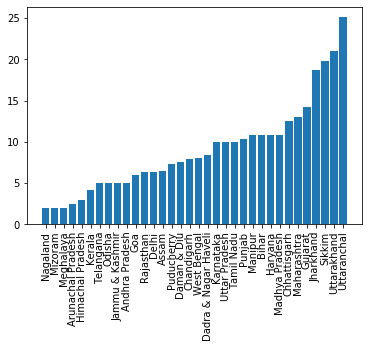

In [9]:
# ... Your code here

# Group by the state and calculate the median for SO2 and sort in ascending order
a = india_df.groupby('state')['so2'].median().sort_values(ascending=True)

# plt.bar(x-axis, y-axis)
b = plt.bar(a.index,height=a)

# rotate the string values in x-axis so that they would not be overlapped
plt.xticks(rotation=90)
plt.show()

### no2 status

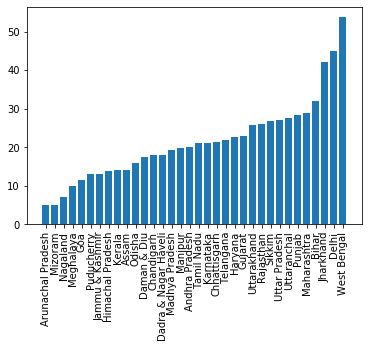

In [86]:
# ... Your code here

# Group by the state and calculate the median for NO2 and sort in ascending order
a = india_df.groupby('state')['no2'].median().sort_values(ascending=True)
# plt.bar(x-axis, y-axis)
b = plt.bar(a.index,height=a)

# rotate the string values in x-axis so that they would not be overlapped
plt.xticks(rotation=90)
plt.show()

### rspm status

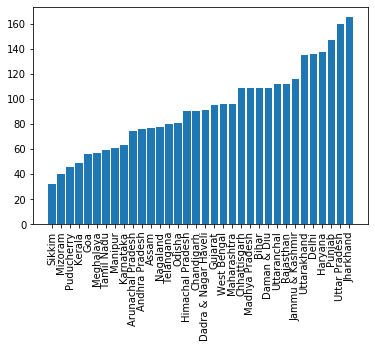

In [87]:
# ... Your code here

# Group by the state and calculate the median for RSPM and sort in ascending order
a = india_df.groupby('state')['rspm'].median().sort_values(ascending=True)
# plt.bar(x-axis, y-axis)
b = plt.bar(a.index,height=a)

# rotate the string values in x-axis so that they would not be overlapped
plt.xticks(rotation=90)
plt.show()

### spm status

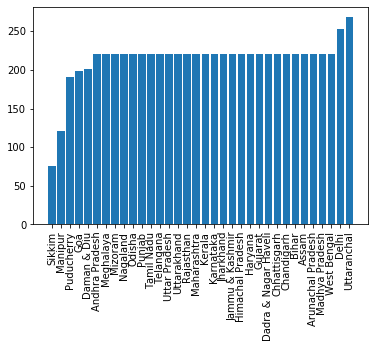

In [88]:
# ... Your code here

# Group by the state and calculate the median for SPM and sort in ascending order
a = india_df.groupby('state')['spm'].median().sort_values(ascending=True)
# plt.bar(x-axis, y-axis)
b = plt.bar(a.index,height=a)

# rotate the string values in x-axis so that they would not be overlapped
plt.xticks(rotation=90)
plt.show()

### What is the yearly trend in a particular state, say ‘Andhra Pradesh’?

Create a new dataframe containing the NO2, SO2, rspm, and spm data regarding state ‘Andhra Pradesh’ only and group it by ‘year’. Display top 5 records after.

In [10]:
# ... Your code here

# df.loc[rows,columns]
# -> india_df.loc[The rows that are in Andhra Pradesh, The required columns]
ap_state = india_df.loc[india_df['state']=='Andhra Pradesh',['no2','so2','rspm','spm','year']]

# group by year and calculate the mean for these four columns
ap_state_gb = ap_state.groupby('year')['no2','so2','rspm','spm'].mean()
ap_state_gb.head()

,no2,so2,rspm,spm
year,,,,
1990,15.296552,8.868966,108.833091,165.469596
1991,18.827778,10.811111,108.833091,154.466208
1992,36.012866,19.766194,108.833091,210.643678
1993,15.961111,8.544444,108.833091,220.783480
1994,18.273016,10.760317,108.833091,177.965950


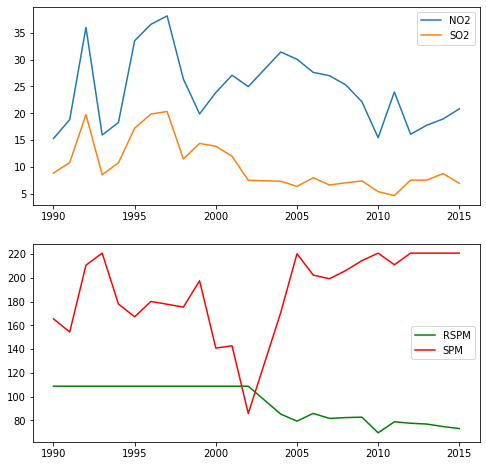

In [11]:
# Display yearly trend graph (year vs. value) in pairs: (a) so2 and no2 (b) rspm and spm. 
# So, you will display TWO graphs altogether.

# ... Your code here

# to set the figure size
plt.figure(figsize=(8,8))

# subplot allows me to display two plots in one
# plt.subplot(row,columns,position)
plt.subplot(2,1,1)
# remember to give the label a name so that Python would know the correct legend 
plt.plot(ap_state_gb['no2'],label='NO2')
plt.plot(ap_state_gb['so2'],label='SO2')
plt.legend()
plt.subplot(2,1,2)
plt.plot(ap_state_gb['rspm'],label='RSPM',c='green')
plt.plot(ap_state_gb['spm'],label='SPM',c='red')
# To make the legend at the same side
plt.legend(loc='center right')

Do you find anythumg alarming? Explain what you can conclude from this Exploratory Data Analysis for the State of Andhra Pradesh. Enter your answer here 

The first thing that draws my attention is that there was a significant fluctuation in 1999 in the first chart. Before 1999, these two factors had a similar trend, which means that they might be generated at the same time. Nevertheless, after 1999, NO2 started to depart from S02 and increased for five years. This might mean that the government had spent more time and money on dealing with SO2 rather than NO2. Fortunately, NO2 had also dropped after 2006. Moreover, one thing the government should be aware of is that they both increased slightly in 2015. 

For the second chart, there are many missing values for RSPM and SPM because they are all replaced by their mean. However, we could still discover some patterns for these two factors. Firstly, SPM had dropped significantly from 1999 to 2002 but had increased dramatically after 2002. Secondly, RSPM has been decreasing over the years, which is good because RSPM is more dangerous to human health. Based on these two findings, I think the state government should pay more attention on how to reduce SPM to improve the air quality.
